In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
#Data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#package for cleaning the data
#!pip install neattext
import neattext.functions as nfx

https://github.com/Jcharis/end2end-nlp-project/tree/main/data

In [4]:
df=pd.read_csv(r"C:\Users\mahee\OneDrive\Desktop\minor_project\emotion_dataset_2_edit.csv")

In [5]:
df.head(10)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...


In [6]:
df.shape


(34792, 2)

In [7]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [8]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

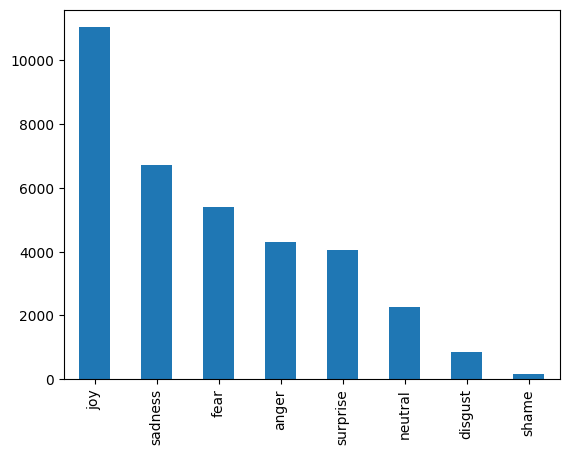

In [10]:
df['Emotion'].value_counts().plot(kind='bar')

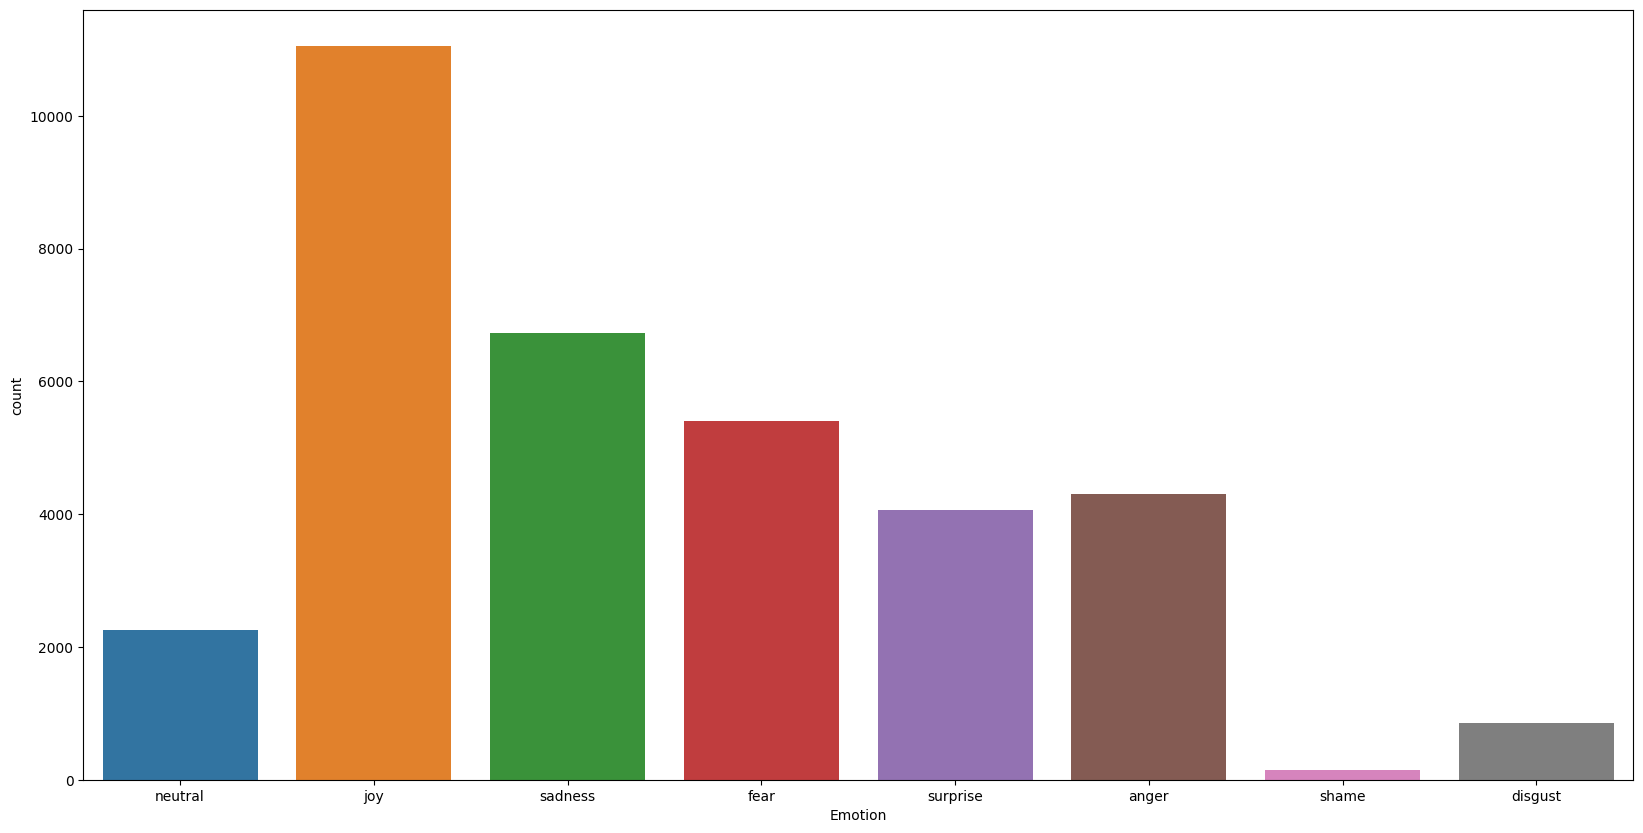

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

+ Dataset Exploration
+ Text clean
+ Sentimental Analysis
+ Keyword Extraction
    - keywords detection for the emotion
    

In [12]:
#import text blob
from textblob import TextBlob

In [13]:
#sentimental Analysis
def check_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result= "Positive"
    elif sentiment < 0:
        result= "Negative"
    else:
        result="Neutral"
    return result

In [14]:
#just for small test
check_sentiment("Baby i love you")

'Positive'

In [15]:
#new sentiments adding into a new column
df['sentiment']=df['Text'].apply(check_sentiment)

In [16]:
df.head()

,Emotion,Text,sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [17]:
#can see the differnce between the original and the given one
df.groupby(['Emotion','sentiment']).size()

Emotion   sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     1534
          Neutral      1844
          Positive     2032
joy       Negative     1682
          Neutral      3649
          Positive     5714
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2629
          Neutral      2128
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1546
          Positive     1893
dtype: int64

In [18]:
#to see the pos,neg and neutral in the given emotion
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

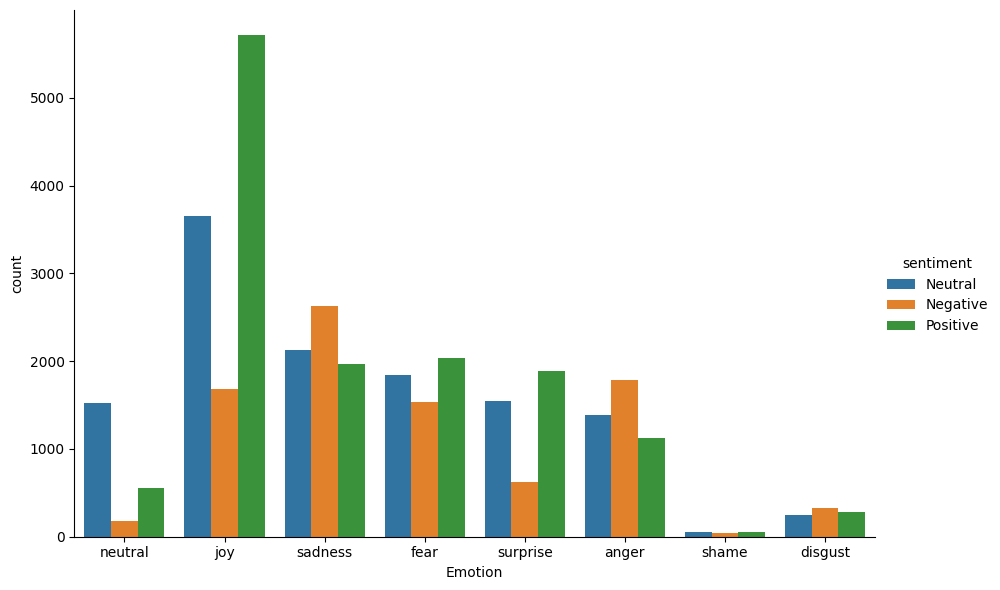

In [19]:
sns.catplot(x='Emotion', hue='sentiment', data=df, kind='count', height=6, aspect=1.5)

+ Text cleaning
    - removing noise
    - stopwords
    - special characters
    - punctuations marks
    - emojis

In [20]:
#text cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
df['clean_text']=df['Text'].apply(nfx.remove_stopwords)

In [22]:
df['clean_text']=df['clean_text'].apply(nfx.remove_userhandles)

In [23]:
df['clean_text']=df['clean_text'].apply(nfx.remove_punctuations)

In [24]:
import re

def remove_colons(text):
    return re.sub(r':', '', text)
df['clean_text'] = df['clean_text'].apply(remove_colons)


In [25]:
import re

def remove_single_chars_and_nums(text):
    # remove all digits
    text = re.sub(r'\d+', '', text)
    # remove all single characters
    text = re.sub(r'\b\w\b', '', text)
    return text
df['clean_text'] = df['clean_text'].apply(remove_single_chars_and_nums)


In [26]:
df[['Text','clean_text']]

,Text,clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz babe naamazed nga ako b...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


#Keyword extraction
+ Extract most commonest wodrds per class of emotion

In [27]:
from collections import Counter

In [28]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [29]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [30]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [31]:
joy_list=df[df['Emotion'] == 'joy']['clean_text'].tolist()

In [32]:
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz   babe naamazed nga ako  babe  despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy  hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops )',
 'shit pants Pure % gravy',
 'life  Leopold truly ha

In [33]:
joy_docx = ''.join(joy_list)

In [34]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz   babe naamazed nga ako  babe  despite negas mas pinaramdam fil ko anglife  Leopold truly happy  hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops )shit pants Pure % gravylife  Leopold truly happy  hopes prayers beloved son come fruition Class jamming paper quarter reason celebr

In [35]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

In [36]:
keyword_joy

{'amp': 653,
 'day': 594,
 'time': 473,
 'Im': 455,
 'like': 440,
 'work': 404,
 'Christmas': 375,
 'today': 326,
 'tomorrow': 315,
 'good': 314,
 'happy': 304,
 'love': 285,
 'going': 283,
 'night': 251,
 'got': 249,
 'home': 248,
 'school': 233,
 'morning': 227,
 'joy': 218,
 'life': 210,
 'hours': 204,
 'feel': 193,
 ')': 192,
 'year': 187,
 'people': 179,
 'long': 178,
 'new': 172,
 'days': 171,
 'great': 168,
 'week': 168,
 'sleep': 158,
 'know': 158,
 'family': 158,
 'RT': 158,
 'hour': 156,
 'God': 143,
 'cant': 140,
 'tonight': 137,
 'excited': 135,
 'friends': 129,
 'friend': 127,
 'feeling': 126,
 'felt': 126,
 'right': 125,
 'me': 125,
 'old': 121,
 'think': 120,
 'de': 119,
 'excitement': 117,
 'start': 117}

In [37]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

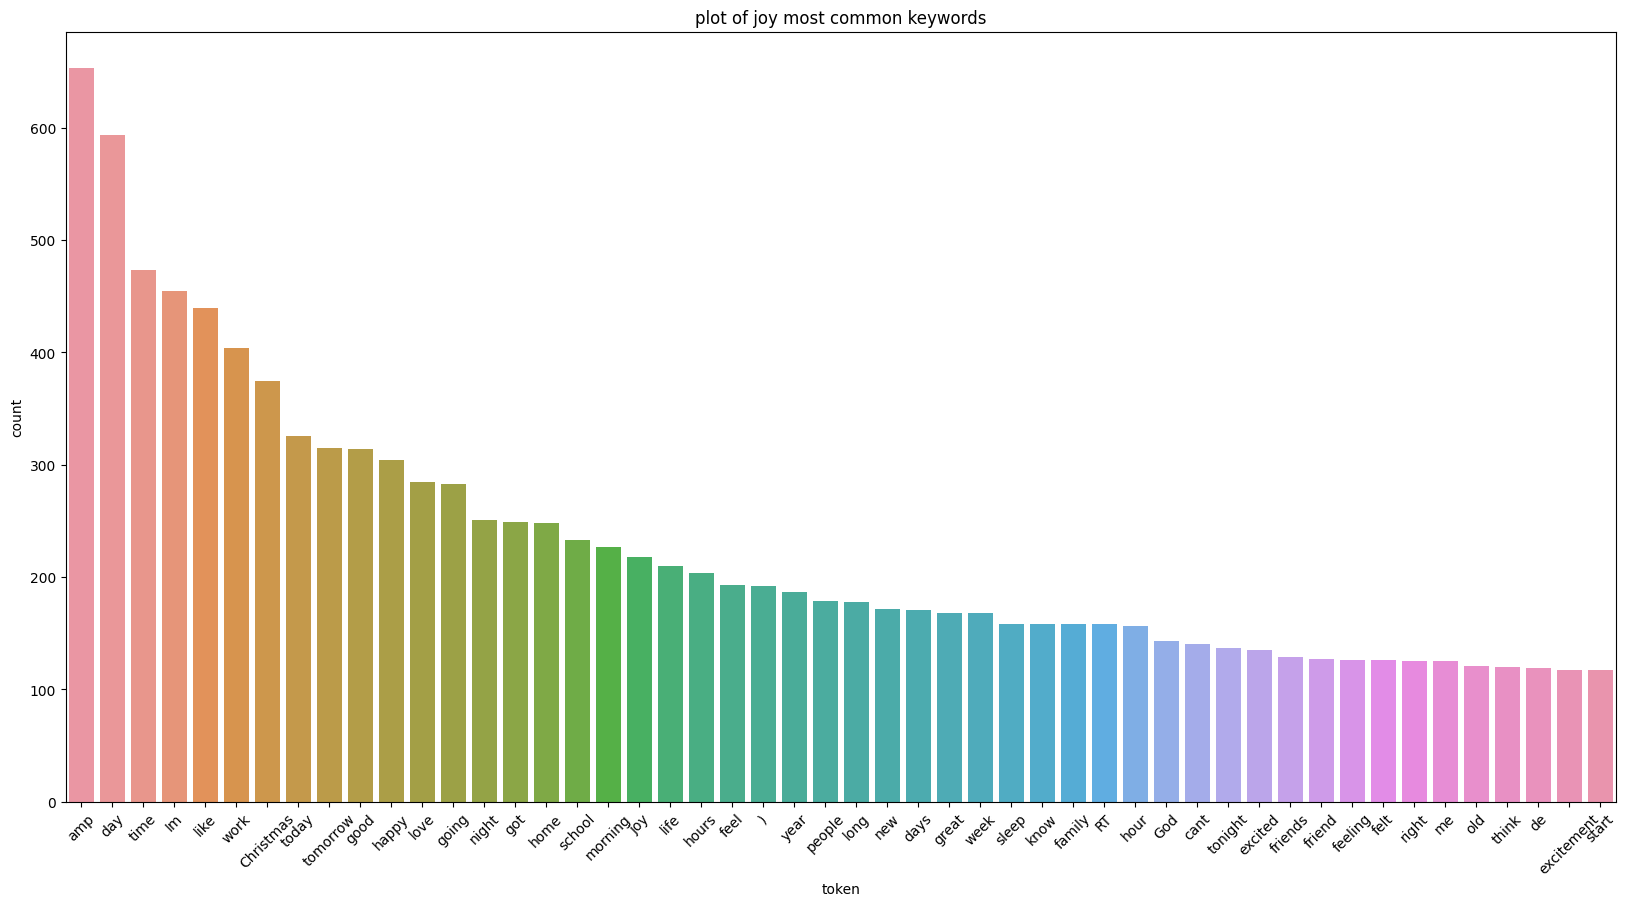

In [38]:
plot_most_common_words(keyword_joy,"joy")

In [39]:
surprise_list=df[df['Emotion'] == 'surprise']['clean_text'].tolist()
surprise_docx = ''.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

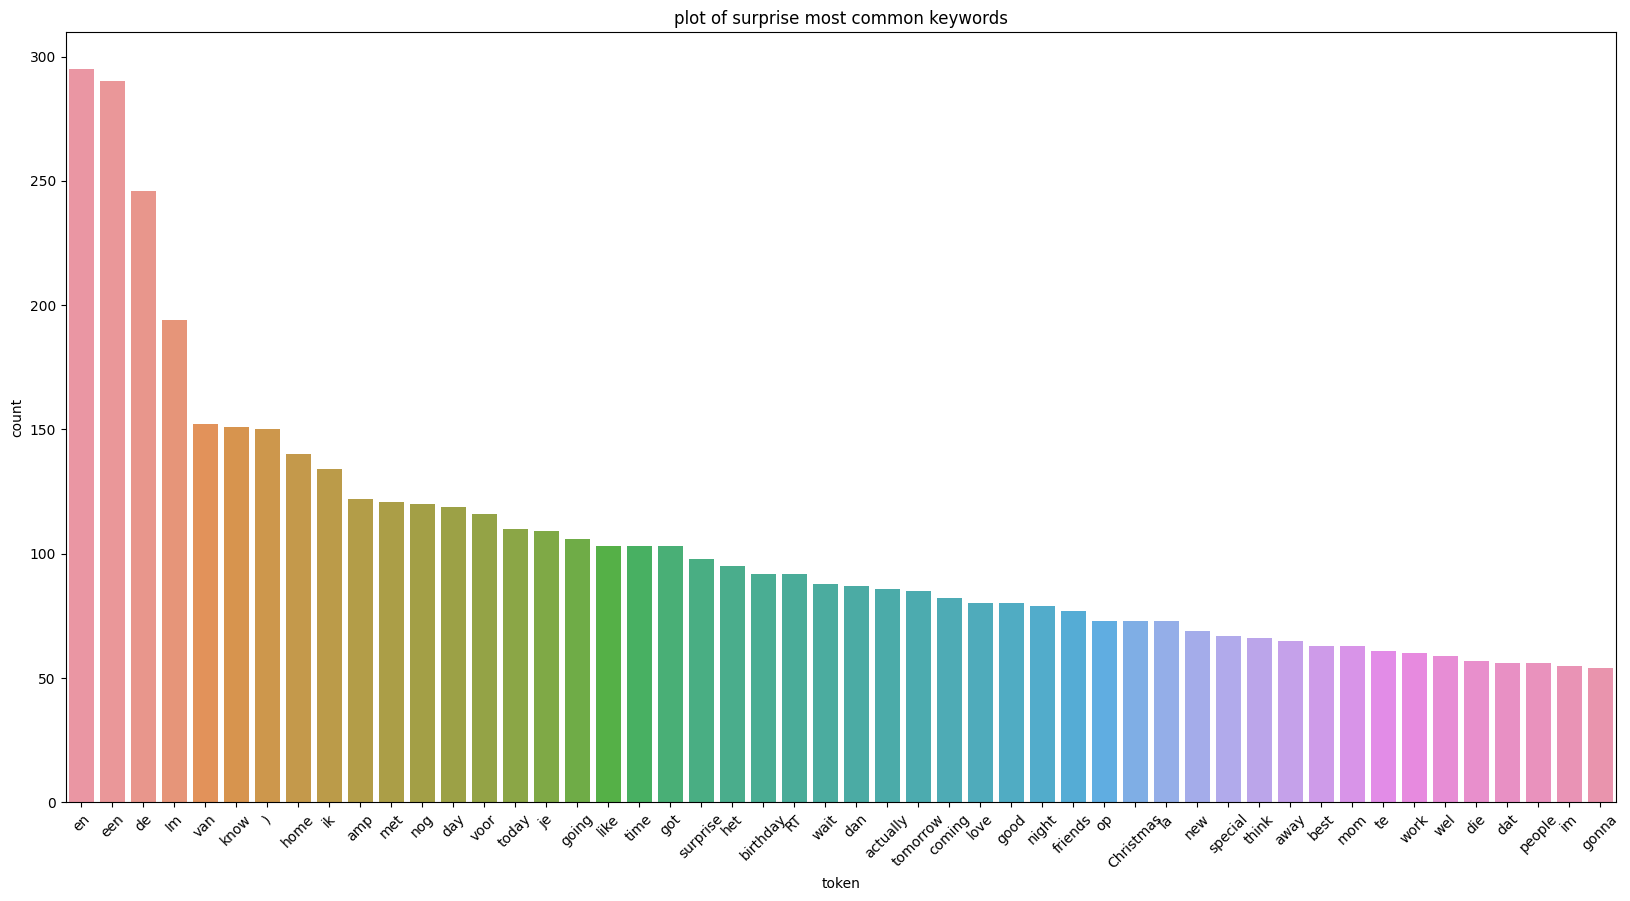

In [40]:
plot_most_common_words(keyword_surprise,"surprise")

In [41]:
#word cloud
from wordcloud import WordCloud

In [42]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

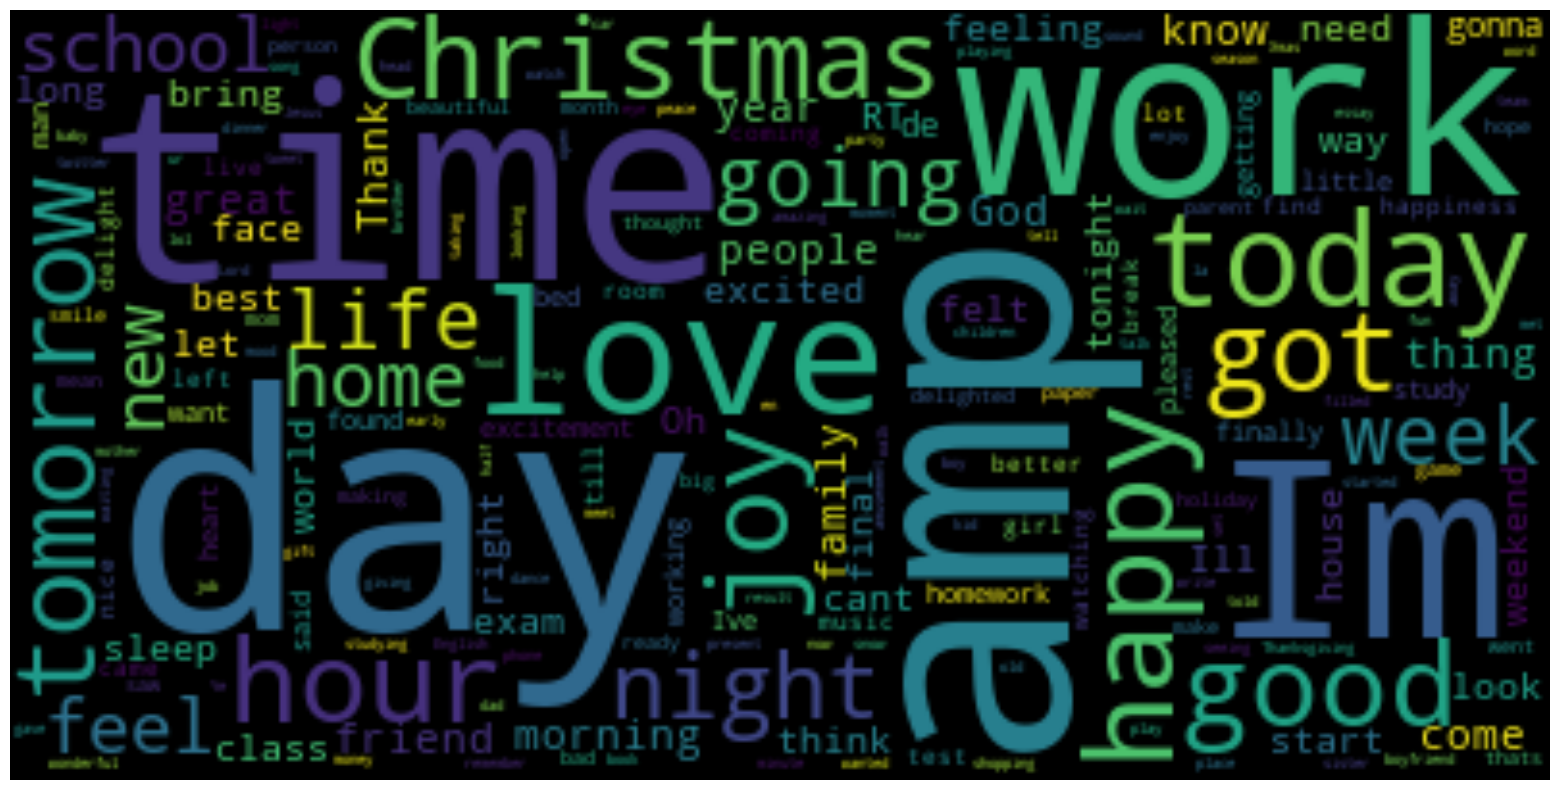

In [43]:
plot_wordcloud(joy_docx)

### Machine Learning
+ Naive Bayes
+ Logistic Regression
+ KNN
+ Decision Tree
### compare with sparknlp/ Nlu john snows lab

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.metrics._plot import plot_confusion_matrix


In [45]:
#splitting the data set
from sklearn.model_selection import train_test_split

### Build Fearures from text

In [46]:
Xfeatures = df['clean_text']
ylabels=df['Emotion']

In [47]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz   babe naamazed nga ako  b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: clean_text, Length: 34792, dtype: object

In [48]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)


In [49]:
cv.get_feature_names_out()


array(['aa', 'aaa', 'aaaaaaaaaaaaa', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'],
      dtype=object)

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Building the model


In [51]:
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [52]:
nv_model.score(X_test,y_test)

0.5639011304847672

In [53]:
#predictions
y_pred_for_nv = nv_model.predict(X_test)

In [54]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [55]:
sample_text=["i am alone"]
vect= cv.transform(sample_text).toarray()
nv_model.predict(vect)

array(['joy'], dtype='<U8')

### Making a pipeline

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])


In [58]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [59]:
pipe_lr.fit(x_train,y_train)


C:\Users\mahee\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [88]:

pipe_lr


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [93]:
import sklearn_json as skljson

In [94]:
skljson.to_json(pipe_lr, "file_name")
deserialized_model = skljson.from_json("file_name")

ModellNotSupported: This model type is not currently supported. Email support@mlrequest.com to request a feature or report a bug.

In [ ]:
json_txt = json.dumps(model_param, indent=4)

In [ ]:
with open('regressor_param.txt', 'w') as file:
    file.write(json_txt)

In [61]:
pipe_lr.score(x_test,y_test)

0.6221498371335505

In [62]:
#predictions
y_pred_by_pl=pipe_lr.predict(x_test)

In [63]:
y_pred_by_pl

array(['surprise', 'anger', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype=object)

In [64]:
ex1 = "today my day was so bad i went to my friend and she was so busy with her works"
pipe_lr.predict([ex1])


array(['sadness'], dtype=object)

In [65]:
ex2 = "i am very stressed and i cant able to find the proper way to concentrate"
pipe_lr.predict([ex2])

array(['sadness'], dtype=object)

In [66]:
pipe_lr.predict_proba([ex1])

array([[1.28119540e-01, 8.68200758e-03, 4.60131413e-02, 2.62262255e-02,
        1.25457054e-06, 7.90590364e-01, 7.80425634e-05, 2.89424665e-04]])

In [67]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [68]:
np.max(pipe_lr.predict_proba([ex1]))

0.7905903638009936

In [69]:
def predict_emotions(text,pipe_lr):
    prediction=pipe_lr.predict([ex2])
    pred_probablity=pipe_lr.predict_proba([ex1])
    pred_percent_all=dict(zip(pipe_lr.classes_,pred_probablity[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_probablity)))
    return pred_percent_all

In [70]:
predict_emotions(ex1,pipe_lr)


Prediction:sadness, Prediction Score:0.7905903638009936


{'anger': 0.12811954000651682,
 'disgust': 0.008682007580448117,
 'fear': 0.04601314130506086,
 'joy': 0.026226225507849813,
 'neutral': 1.2545705418340943e-06,
 'sadness': 0.7905903638009936,
 'shame': 7.80425633819017e-05,
 'surprise': 0.00028942466520718484}

### Evaluation

In [71]:
#classifaction 
print(classification_report(y_test,y_pred_by_pl))

              precision    recall  f1-score   support

       anger       0.62      0.54      0.58      1283
     disgust       0.62      0.17      0.27       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.68      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.58      0.58      2015
       shame       0.84      0.75      0.79        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.65      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438



In [72]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_by_pl)

array([[ 697,    8,   70,  230,   83,  153,    1,   41],
       [  37,   51,   27,   86,    6,   58,    1,   26],
       [  83,    4, 1077,  228,   40,  144,    0,   69],
       [ 117,    6,  131, 2486,  123,  272,    1,  175],
       [  13,    1,   11,   96,  492,   55,    0,    7],
       [ 127,    8,   98,  461,   68, 1159,    1,   93],
       [   0,    0,    1,    5,    1,    2,   27,    0],
       [  50,    4,   50,  396,   28,  147,    1,  505]], dtype=int64)

In [73]:
import sklearn
print(sklearn.__version__)


1.2.2


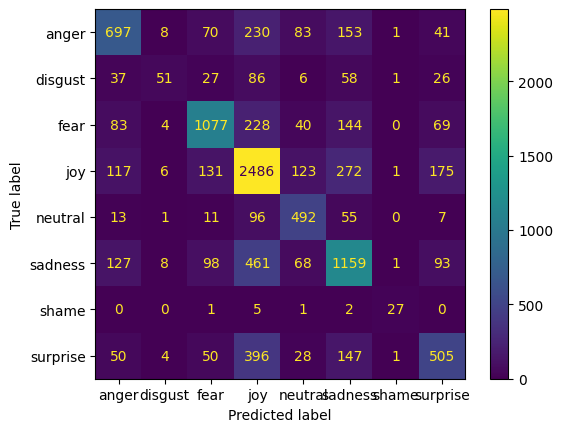

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipe_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=pipe_lr.classes_)
cmd.plot()


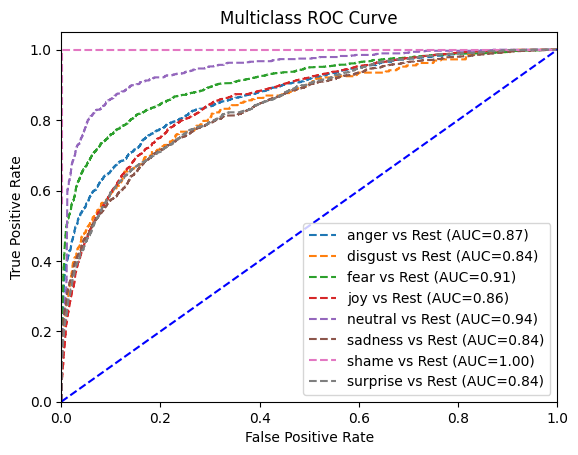

In [76]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# predict probabilities for each class
pred_prob = pipe_lr.predict_proba(x_test)

# initialize empty dictionaries and arrays
fpr = {}
tpr = {}
roc_auc = {}
thresholds = {}

# compute FPR, TPR, and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label="%s vs Rest (AUC=%0.2f)" % (pipe_lr.classes_[i], roc_auc[i]))

# plot random guess line
plt.plot([0,1], [0,1], "b--")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


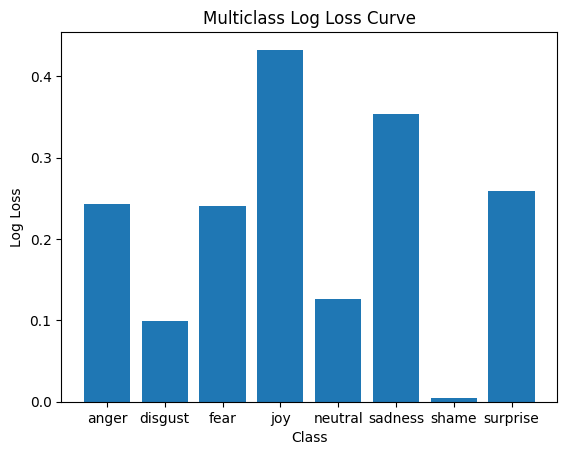

In [77]:
from sklearn.metrics import log_loss

# compute log loss for each class
y_pred_prob = pipe_lr.predict_proba(x_test)
log_losses = []
for i in range(n_classes):
    log_loss_i = log_loss(y_test_binarized[:, i], y_pred_prob[:, i])
    log_losses.append(log_loss_i)

# plot log loss for each class
plt.figure()
plt.bar(pipe_lr.classes_, log_losses)
plt.xlabel("Class")
plt.ylabel("Log Loss")
plt.title("Multiclass Log Loss Curve")
plt.show()


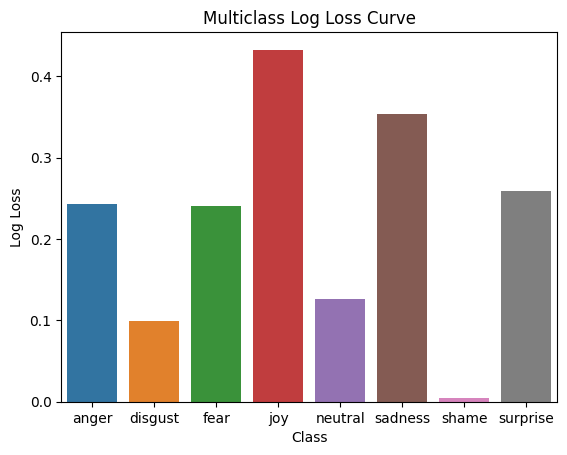

In [78]:
import seaborn as sns
import pandas as pd

# compute log loss for each class
y_pred_prob = pipe_lr.predict_proba(x_test)
log_losses = []
for i in range(n_classes):
    log_loss_i = log_loss(y_test_binarized[:, i], y_pred_prob[:, i])
    log_losses.append(log_loss_i)

# create dataframe with class labels and log losses
log_loss_df = pd.DataFrame({'class': pipe_lr.classes_, 'log_loss': log_losses})

# plot log loss for each class
plt.figure()
sns.barplot(x='class', y='log_loss', data=log_loss_df)
plt.xlabel("Class")
plt.ylabel("Log Loss")
plt.title("Multiclass Log Loss Curve")
plt.show()


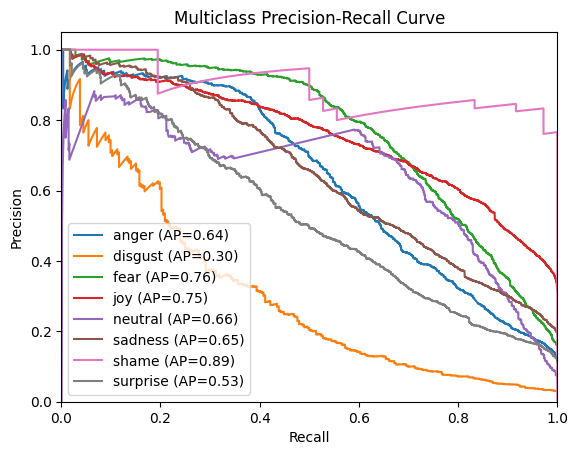

In [79]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# convert y_test to binary representation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# predict probabilities for each class
pred_prob = pipe_lr.predict_proba(x_test)

# initialize empty dictionaries and arrays
precision = {}
recall = {}
avg_precision = {}

# compute precision, recall, and average precision for each class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], pred_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_binarized[:, i], pred_prob[:, i])

# plot precision-recall curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], linestyle='-',
             label="%s (AP=%0.2f)" % (pipe_lr.classes_[i], avg_precision[i]))

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title("Multiclass Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()


In [80]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_lr, Xfeatures, ylabels, cv=cv, scoring='accuracy')
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


C:\Users\mahee\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahee\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

CV Accuracy: 0.633 +/- 0.005


### Saving the model

In [96]:
import joblib

In [ ]:
#model_file= open("Maheendra_nlp_model1.pkl","wb")
#joblib.dump(pipe_lr,model_file)
#model_file.close()

In [97]:
model = joblib.load('Maheendra_nlp_model1.pkl')

In [99]:
ex3="i am very sad today no one is talking to me"

In [102]:
model.predict([ex3])

array(['sadness'], dtype=object)